In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('house_price_Dống-Da_Hà-Nội_subdata.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area               665 non-null    float64
 1   price              617 non-null    float64
 2   postDate           671 non-null    int64  
 3   land_certificate   369 non-null    object 
 4   house_direction    42 non-null     object 
 5   balcony_direction  24 non-null     object 
 6   toilet             240 non-null    float64
 7   bedroom            320 non-null    float64
 8   floor              366 non-null    float64
 9   lat                671 non-null    float64
 10  long               671 non-null    float64
 11  property_type      671 non-null    object 
dtypes: float64(7), int64(1), object(4)
memory usage: 63.0+ KB


In [63]:
# phat hien gia tri khuyet thieu
print(df.isnull().sum())
# df.isna().sum()

area                 2
price                0
postDate             0
land_certificate     0
house_direction      0
balcony_direction    0
toilet               0
bedroom              0
floor                0
lat                  0
long                 0
property_type        0
dtype: int64


area                 2
price                0
postDate             0
land_certificate     0
house_direction      0
balcony_direction    0
toilet               0
bedroom              0
floor                0
lat                  0
long                 0
property_type        0
dtype: int64

In [4]:
# Xóa bỏ hết tất cả những dòng dữ liệu không có thông tin về giá
df.dropna(subset=['price'],inplace=True)

In [5]:
# Thực hiện xử lý giá trị khuyết thiếu: Thay thế giá trị khuyết thiếu của land_certificate bằng =”không có thông tin”,
# house_direction, balcony_direction, toilet, bedroom, Floor bằng giá trị có tần số xuất hiện lớn nhất
# của các thuộc tính đó
df['land_certificate'].fillna('không có thông tin',inplace=True)
replace_cols = ['house_direction', 'balcony_direction', 'toilet', 'bedroom', 'floor']
for col in replace_cols:
    replace_value = df[col].mode()[0]
#     print(col,replace_value)
    df[col].fillna(replace_value,inplace=True)


In [8]:
# Lọc thông tin những bất động sản ở trong ngõ thành bộ dữ liệu nhà ngõ
nha_ngo = df[df['property_type']=='trong ngo']

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,dong-Nam,dong-Nam,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,dong-Nam,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.009862,105.838083,trong ngo
...,...,...,...,...,...,...,...,...,...,...,...,...
444,90.0,32000.0,44325,không có thông tin,dong-Bac,Tay-Bac,4.0,3.0,8.0,21.017799,105.810572,trong ngo
445,58.0,15800.0,44325,So do,dong-Nam,dong-Nam,4.0,5.0,7.0,21.020556,105.828657,trong ngo
446,96.0,10200.0,44325,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.012310,105.828978,trong ngo
447,38.0,3900.0,44325,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.006694,105.835635,trong ngo


In [12]:
# Tính toán giá/m2 (đơn vị triệu/m2) với loại hình nhà ngõ
nha_ngo.loc[:,'gia_m2'] = round(nha_ngo['price']/nha_ngo['area'],2)
nha_ngo

C:\Users\Phuccq\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type,gia_m2
0,50.0,14700.0,44197,So do,dong-Nam,dong-Nam,4.0,6.0,6.0,21.015698,105.824583,trong ngo,294.00
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo,73.68
2,62.0,11000.0,44268,So do,dong-Nam,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo,177.42
3,26.0,2900.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.014325,105.834918,trong ngo,111.54
4,40.0,3950.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.009862,105.838083,trong ngo,98.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,90.0,32000.0,44325,không có thông tin,dong-Bac,Tay-Bac,4.0,3.0,8.0,21.017799,105.810572,trong ngo,355.56
445,58.0,15800.0,44325,So do,dong-Nam,dong-Nam,4.0,5.0,7.0,21.020556,105.828657,trong ngo,272.41
446,96.0,10200.0,44325,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.012310,105.828978,trong ngo,106.25
447,38.0,3900.0,44325,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.006694,105.835635,trong ngo,102.63


<AxesSubplot:>

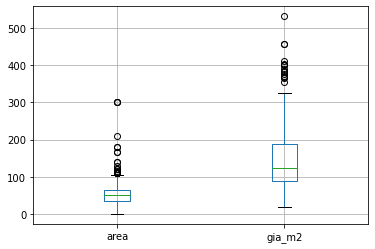

In [28]:
nha_ngo.loc[:,['area','gia_m2']].boxplot()

In [47]:
# Phát hiện giá trị ngoại lai của các thuộc tính: diện tích bằng phương pháp IQR
# sns.boxplot(x=nha_ngo['area'])
Q1_area = nha_ngo['area'].quantile(0.25,'linear')
Q3_area = nha_ngo['area'].quantile(0.75)
IQR_area = Q3_area-Q1_area
lower_area = Q1_area-IQR_area*1.5
upper_area = Q3_area+IQR_area*1.5
print('lower bound area: ',lower_area)
print('upper bound area: ',upper_area)
print('Ngoại lai của thuộc tính area là:\n',nha_ngo.loc[:,'area'][(nha_ngo['area']<lower_area)|(nha_ngo['area']>upper_area)])

lower bound area:  -5.625
upper bound area:  105.375
Ngoại lai của thuộc tính area là:
 12     110.0
16     120.0
20     110.0
33     210.0
37     120.0
53     110.0
71     130.0
190    140.0
225    180.0
232    300.0
256    110.0
314    110.0
323    115.0
351    300.0
371    111.0
374    168.0
376    140.0
387    110.0
392    300.0
404    112.0
405    168.0
412    120.0
414    112.0
442    180.0
Name: area, dtype: float64


In [68]:
# Phát hiện giá trị ngoại lai của các thuộc tính: gia_m2 bằng phương pháp IQR
# sns.boxplot(x=nha_ngo['gia_m2'])
Q1_gia_m2 = nha_ngo['gia_m2'].quantile(0.25,'linear')
Q3_gia_m2 = nha_ngo['gia_m2'].quantile(0.75)
IQR_gia_m2 = Q3_gia_m2-Q1_gia_m2
lower_gia_m2 = Q1_gia_m2-IQR_gia_m2*1.5
upper_gia_m2 = Q3_gia_m2+IQR_gia_m2*1.5
print('lower bound gia_m2: ',lower_gia_m2)
print('upper bound gia_m2: ',upper_gia_m2)
print('Ngoại lai của thuộc tính gia_m2 là:\n',nha_ngo.loc[:,'gia_m2']\
      [(nha_ngo['gia_m2']<lower_gia_m2)|(nha_ngo['gia_m2']>upper_gia_m2)])

lower bound gia_m2:  -60.81375000000001
upper bound gia_m2:  335.49625000000003
Ngoại lai của thuộc tính gia_m2 là:
 80        inf
85        inf
92        inf
99        inf
107       inf
108       inf
126       inf
137       inf
141       inf
153       inf
159       inf
162       inf
167       inf
185    391.00
196       inf
198       inf
201    457.83
213    376.40
214    370.79
248    369.57
258    531.43
304    411.90
308    400.00
309    366.67
314    381.82
320    402.35
351    400.00
381    400.00
410    457.14
424    384.62
444    355.56
Name: gia_m2, dtype: float64


In [70]:
# Thực hiện loại bỏ các dòng dữ liệu ngoại lai
nha_ngo1 = nha_ngo.loc[(nha_ngo['area']>=lower_area) & (nha_ngo['area']<=upper_area)]
nha_ngo1 = nha_ngo.loc[(nha_ngo['gia_m2']>=lower_gia_m2) & (nha_ngo['gia_m2']<=upper_gia_m2)]
nha_ngo1

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type,gia_m2
0,50.0,14700.0,44197,So do,dong-Nam,dong-Nam,4.0,6.0,6.0,21.015698,105.824583,trong ngo,294.00
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo,73.68
2,62.0,11000.0,44268,So do,dong-Nam,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo,177.42
3,26.0,2900.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.014325,105.834918,trong ngo,111.54
4,40.0,3950.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.009862,105.838083,trong ngo,98.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,25.0,2850.0,44325,không có thông tin,dong-Nam,dong-Nam,3.0,2.0,4.0,21.029522,105.827353,trong ngo,114.00
445,58.0,15800.0,44325,So do,dong-Nam,dong-Nam,4.0,5.0,7.0,21.020556,105.828657,trong ngo,272.41
446,96.0,10200.0,44325,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.012310,105.828978,trong ngo,106.25
447,38.0,3900.0,44325,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.006694,105.835635,trong ngo,102.63


<AxesSubplot:ylabel='Density'>

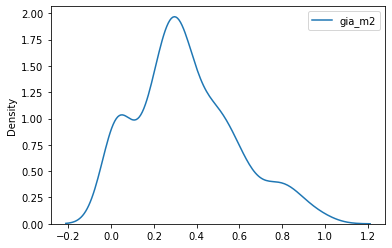

In [91]:
# Chuẩn hóa dữ liệu của tất cả các thuộc tính: price/m2 bằng các phương pháp: min-max scaling, z- score scaling, Robust scaling
# so sánh phân bố của thuộc tính này trước và sau khi chuẩn hóa
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
mms = MinMaxScaler()
df_mms = mms.fit_transform(pd.DataFrame(nha_ngo1['gia_m2']))
df_mms = pd.DataFrame(df_mms, columns=['gia_m2'])
sns.kdeplot(data=df_mms)
# sns.kdeplot(data=nha_ngo['gia_m2'])

<AxesSubplot:ylabel='Density'>

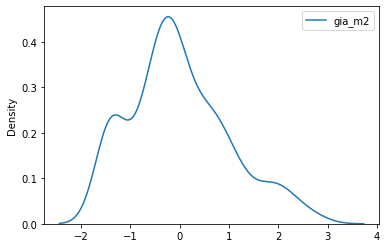

In [96]:
std = StandardScaler()
df_std = std.fit_transform(pd.DataFrame(nha_ngo1['gia_m2']))
df_std = pd.DataFrame(df_std,columns=['gia_m2'])
sns.kdeplot(data=df_std)

<AxesSubplot:ylabel='Density'>

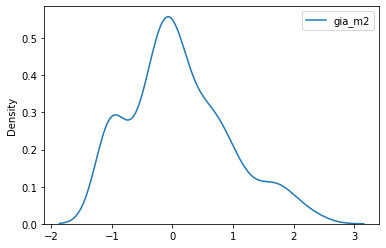

In [97]:
rbs = RobustScaler()
df_rbs = rbs.fit_transform(pd.DataFrame(nha_ngo1['gia_m2']))
df_rbs = pd.DataFrame(df_rbs,columns=['gia_m2'])
sns.kdeplot(data=df_rbs)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617 entries, 0 to 670
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area               615 non-null    float64
 1   price              617 non-null    float64
 2   postDate           617 non-null    int64  
 3   land_certificate   617 non-null    object 
 4   house_direction    617 non-null    object 
 5   balcony_direction  617 non-null    object 
 6   toilet             617 non-null    float64
 7   bedroom            617 non-null    float64
 8   floor              617 non-null    float64
 9   lat                617 non-null    float64
 10  long               617 non-null    float64
 11  property_type      617 non-null    object 
dtypes: float64(7), int64(1), object(4)
memory usage: 62.7+ KB
